### <h1><center> Projet Python : Airline passengers satisfaction </center></h1>
###  <h1><center>    Par Inès Bettaïeb, 15 Mai 2022
    
    
    
    

# Description du projet

**Contexte de l'étude :**

Ce projet s’intéressera à l’analyse d’une enquête de satisfaction des passagers menée par une compagnie aérienne.
Le jeu de données qui sera étudier est en accès libre et a été téléchargé via Kaggle [<sup id="fn2-back">1</sup>](#fn2 "footnote and tooltip 2"). Il se compose de deux fichiers :
- Un jeu de données d’entraînement (*training set*) contenant 103 904 lignes et 25 variables
- Un jeu de données de test (*testing set*) contenant lignes et 25 976 lignes et 25 variables 

L’objectif de ce projet est double :
- Il s'agira d'une part d'analyser et comprendre les facteurs qui sont fortement corrélés à la satisfaction (ou respectivement l’insatisfaction des passagers) ;
- D'autre part de construire un modèle prédictif qui permettra d’estimer la probabilité de satisfaction des passagers.

Enfin, il s'agira aussi pour la compagnie aérienne de déterminer les points d'amélioration en ce qui concerne la qualité de ses services proposés à ses clients. Ce point est d'autant plus crucial étant donné que le secteur aérien a été fortement perturbé au cours des deux dernières années et l'est encore aujourd'hui.

**Type d'approche envisagée :**

On se placera dans le cadre d’un **problème de classification supervisée à deux classes**, où la variable à expliquer est la colonne ‘satisfaction’: 
- classe positive (satisfied)
- classe négative (neutral/dissatisfied)

L’analyse de la distribution de ces deux classes montre une répartition plutôt équilibrée [<sup id="fn2-back">2</sup>](#fn2 "footnote and tooltip 2") et de ce fait on ne se trouve pas dans la situation d’un dataset avec **classes déséquilibrées**.

**Variables présentes dans le jeu de données :**

En ce qui concerne les variables, le dataset est assez hétérogène [<sup id="fn2-back">3</sup>](#fn2 "footnote and tooltip 2") et contient :
- 4 variables numériques qui sont : 'Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'
- 3 variables catégorielles : 'Gender', 'Customer Type', 'Type of Travel'
- 15 variables ordinales et concernent tous les services proposés par la compagnie aérienne durant le voyage et notés sur une échelle de 0 à 5.

**Méthodologie :**

Le notebook sera articulé en cinq parties distinctes :
- Analyse exploratoire des données : données manquantes ou aberrantes, transformation, distribution des variables, corrélations entre variables et relation avec la variable à expliquer
- Création d’un modèle de référence (baseline model) afin d’évaluer la performance du modèle 
- Déterminer quelles variables ont un impact significatif sur la satisfaction des passagers
- Processus de sélection de variables et paramétrage des hyperparamètres 
- Analyse des erreurs 
- Interprétation et prise de reculs des résultats

L’ensemble de ces opérations seront intégrées dans un pipeline qui depuis le chargement des données procédera aux différentes opérations de transformations de données jusqu’à la prédiction finale.

[<sup id="fn2">1</sup>](#fn2-back) Voir partie 'Description du jeu de données' pour plus de précision.<br>
[<sup id="fn2">2</sup>](#fn2-back) Voir partie 1.<br>
[<sup id="fn2">3</sup>](#fn2-back) Voir partie 'Statistiques univariées' pour un descriptif des données.

#### Chargement des packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import RandomizedSearchCV
import plotly.graph_objects as go

import Utilis.utilis as myModule #class & methods imported from Utilis folder
from plotly import graph_objs as go
from plotly.subplots import make_subplots

### Descriptif du jeu de données 

Le jeu de données est en accès libre et a été téléchargé sur la plateforme *Kaggle* [<sup id="fn2-back">1</sup>](#fn2 "footnote and tooltip 2") et contient deux base de données:
- Une base d'entraînement (training set)
- Une base de test (testing set)


Dans la suite du notebook, le modèle sera calibré sur la base d'entraînement et la performance du modèle sera évaluée sur la base de test. 


 



[<sup id="fn2">1</sup>](#fn2-back) *https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction*


In [2]:
df_train = pd.read_csv("Datasets/train.csv")
df_test = pd.read_csv("Datasets/test.csv")

y_train = df_train.satisfaction.unique()
y_test = df_test.satisfaction.unique()

In [3]:
print('\033[1m' + "******** Descriptif du jeu de données (Base d'entraînement)******\n" + '\033[0m')
print("{} lignes \n".format(len(df_train)))
print("{} attributs (dont la variable à expliquer)\n".format(len(df_train.columns)))
print("Variable à expliquer : {} classes ({} and {}) \n"\
                                                            .format(len(y_train),y_train[0], y_train[1])
     )
print('\033[1m' + "******** Visualisation des premières lignes (Base d'entraînement)********\n" + '\033[0m')
df_train.head()

******** Descriptif du jeu de données (Base d'entraînement)******

103904 lignes 

25 attributs (dont la variable à expliquer)

Variable à expliquer : 2 classes (neutral or dissatisfied and satisfied) 

******** Visualisation des premières lignes (Base d'entraînement)********



Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [4]:
print('\033[1m' + "******** Descriptif du jeu de données (Base de test)******\n" + '\033[0m')
print("{} lignes \n".format(len(df_test)))
print("{} attributs (dont la variable à expliquer)\n".format(len(df_test.columns)))
print("Variable à expliquer : {} classes ({} and {}) \n"\
                                                            .format(len(y_test),y_test[0], y_test[1])
     )
print('\033[1m' + "******** Visualisation des premières lignes (Base de test)********\n" + '\033[0m')
df_test.head()

******** Descriptif du jeu de données (Base de test)******

25976 lignes 

25 attributs (dont la variable à expliquer)

Variable à expliquer : 2 classes (satisfied and neutral or dissatisfied) 

******** Visualisation des premières lignes (Base de test)********



Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                                  0  ...                       2   
3                                  0  ...                       1   
4                                  3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied  

[5 rows x 25 columns]

Au vu des premières observations :
- Les deux premières colonnes ("Unnamed: 0" et "id") doivent être supprimées du dataset avant d'étudier plus en détails les features.
- Types de variables hétérogènes : continues, catégorielles et ordinales.
- La variable à expliquer ("satisfaction") est une variable binaire et contient deux classes : satisfied ou neutral or dissatisfied. [<sup id="fn2-back">1</sup>](#fn2 "footnote and tooltip 2")

[<sup id="fn2">1</sup>](#fn2-back) Plus loin, nous remapperons ces labels en entiers 0 ou 1 avant de modéliser

In [5]:
# suppression des deux premières colonnes
new_df_train = df_train.drop(columns=['id','Unnamed: 0'])
new_df_test = df_test.drop(columns=['id','Unnamed: 0'])

# création y_train, y_test, X_train, X_test
X_train = new_df_train.iloc[:, 0:22]
X_test = new_df_test.iloc[:, 0:22]
y_train = new_df_train["satisfaction"]
y_test = new_df_test["satisfaction"]

### Partie I : Analyse descriptive

###  I.1 : Analyse des valeurs manquantes

- Base d'entraînement

In [6]:
missing_attributs = myModule.Utilis()
missing_attributs_train = missing_attributs.missing_values(X_train)
missing_attributs_train = missing_attributs_train[missing_attributs_train["# missing values"]>0]

print("Valeurs manquantes (Base d'entraînement)\n")
missing_attributs_train

Valeurs manquantes (Base d'entraînement)



Columns name # missing values
21  Arrival Delay in Minutes              310

- Base de test

In [7]:
missing_attributs = myModule.Utilis()
missing_attributs_test = missing_attributs.missing_values(X_test)
missing_attributs_test = missing_attributs_test[missing_attributs_test["# missing values"]>0]

print("Valeurs manquantes (Base de test)\n")
missing_attributs_test

Valeurs manquantes (Base de test)



Columns name # missing values
21  Arrival Delay in Minutes               83

### Remarques générales
Sur les 22 variables présentes, 1 variable contient des données manquantes dans la base d'entraînement et de test.

### I.2 : Analyse de la variable à expliquer (target)

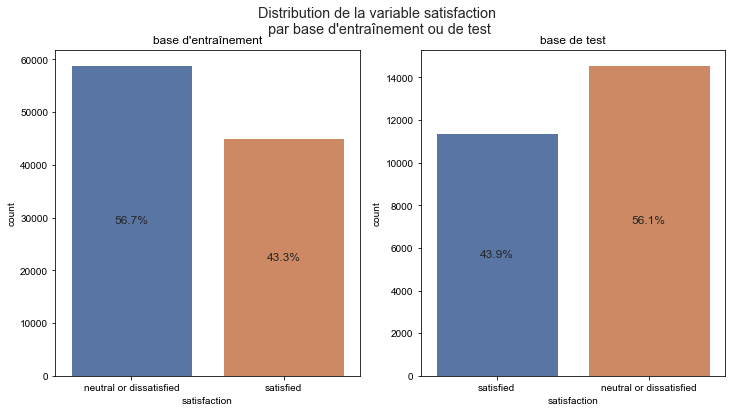

In [8]:
myModule.Utilis().plot_hist(new_df_train,new_df_test)

- Environ 56% des clients ont exprimé un avis neutre ou une insatisfaction.
- La répartition montre que les classes sont plus ou moins équilibrées.
- L'analyse de la variable à expliquer à la fois dans la base d'entraînement et de test montre un profil assez similaire. 

### Analyse des features

### I.3 : Statistiques Univariées


In [9]:
attributs = myModule.Utilis()
attributs.detail_attributs(new_df_train)

Columns name  \
0                              Gender   
1                       Customer Type   
2                                 Age   
3                      Type of Travel   
4                               Class   
5                     Flight Distance   
6               Inflight wifi service   
7   Departure/Arrival time convenient   
8              Ease of Online booking   
9                       Gate location   
10                     Food and drink   
11                    Online boarding   
12                       Seat comfort   
13             Inflight entertainment   
14                   On-board service   
15                   Leg room service   
16                   Baggage handling   
17                    Checkin service   
18                   Inflight service   
19                        Cleanliness   
20         Departure Delay in Minutes   
21           Arrival Delay in Minutes   
22                       satisfaction   

                                              Details  
0                                         Homme/Femme  
1                                      Loyal/Disloyal  
2                                       Age du client  
3           Objet du voyage (e.g. Personnel/Business)  
4                         Eco/Eco Plus/Business Class  
5                                  Distance parcourue  
6              Niveau de satisfaction du WIFI (0 à 5)  
7               Niveau de satisfaction Départ/Arrivée  
8         Niveau de satisfaction réservation en ligne  
9          Niveau de satisfaction "gate localisation"  
10  Niveau de satisfaction sur la nourriture et la...  
11          Niveau de satisfaction sur l"embarquement  
12   Niveau de satisfaction sur le confort des sièges  
13     Niveau de satisfaction sur les divertissements  
14     Niveau de satisfaction sur les services à bord  
15  Niveau de satisfaction sur l"espacement des ja...  
16  Niveau de satisfaction sur la prise en charge ...  
17        Niveau de satisfaction sur l"enregistrement  
18  Niveau de satisfaction sur les services durant...  
19                                           Propreté  
20                 Retard (en minutes) depuis le tard  
21                    Retard (en minutes) à l"arrivée  
22  variable à expliquer : Neutral or dissatisfact...

La majorité des variables présentes dans le jeu de données sont de types catégorielles ou ordinales. Néanmoins, lorsque on vérifie le type[<sup id="fn1-back">1</sup>](#fn1 "footnote and tooltip 1"), on remarque essentiellement deux types :**object** et **int64**.

Dans notre pipeline on choisira donc la définition de **3 types de variables** définies comme suit :

- **Variables numériques** : age,flight distance, departure delay in minutes, arrival delay in minutes
- **Variables catégorielles** : gender, customer type, type of travel
- **Variables ordinales** : class, inflight wifi service, departure/arrival time convenient, ease  of online booking,gate location, food and drink, online boarding, seat comfort, inflight entertainment, on-board service, leg room service,baggage handling, checkin service, inflight service, cleanliness

Les variables **catégorielles** et **ordinales** seront renommées en type catégorie et on utilisera la méthode *make_column_selector* pour définir les variables numériques et catégorielles. 
En ce qui concerne l'encodage des variables catégorielles, nous évoquerons plus loin [<sup id="fn2-back">2</sup>](#fn2 "footnote and tooltip 2") les stratégies associées.
 


[<sup id="fn1">1</sup>](#fn1-back) *en appelant la méthode dtypes*<br>
[<sup id="fn2">2</sup>](#fn2-back) *cf. Partie Stratégies pour encoder les variables catégorielles*


### Analyse des variables catégorielles

In [10]:
# remplacer le type object et int64 pour les variables catégorielles & ordinales
categorical_indexes = [0,1,3,4] + list(range(6,20))
#categorical_indexes
X_train.iloc[:,categorical_indexes] = X_train.iloc[:,categorical_indexes].astype("category")
X_train.dtypes

Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                category
Flight Distance                         int64
Inflight wifi service                category
Departure/Arrival time convenient    category
Ease of Online booking               category
Gate location                        category
Food and drink                       category
Online boarding                      category
Seat comfort                         category
Inflight entertainment               category
On-board service                     category
Leg room service                     category
Baggage handling                     category
Checkin service                      category
Inflight service                     category
Cleanliness                          category
Departure Delay in Minutes              int64
Arrival Delay in Minutes          

In [11]:
# define numerical, categorical & ordinal variables 


ordinal_cols, categorical_cols, numerical_cols = myModule.Utilis().define_cols(X_train)

print("************* Types de variables présentes dans la base de données***************\n")

print('\033[1m' + "Ordinal variables ({} features):\n" .format(len(ordinal_cols)) + '\033[0m',"\n",ordinal_cols,"\n")

print('\033[1m' +  "Categorical variables ({} features):\n".format(len(categorical_cols)) + '\033[0m',"\n",categorical_cols,"\n")

print('\033[1m' + "Numerical variables ({} features):\n".format(len(numerical_cols))+ '\033[0m'"\n","\n",numerical_cols,"\n")

************* Types de variables présentes dans la base de données***************

Ordinal variables (15 features):
 
 ['Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'] 

Categorical variables (3 features):
 
 ['Gender', 'Customer Type', 'Type of Travel'] 

Numerical variables (4 features):

 
 ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'] 



Proportion des variables Gender, Loyal Customer et Business Travel



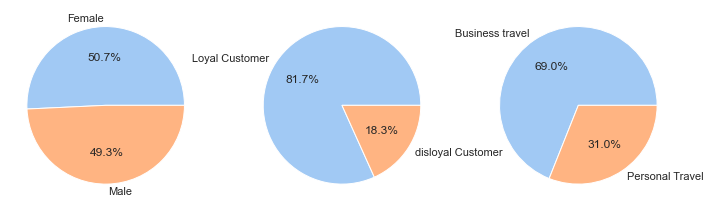

In [12]:
len_cat = len(categorical_cols)
print("Proportion des variables Gender, Loyal Customer et Business Travel\n")
myModule.Utilis().plot_pie(len_cat,categorical_cols,X_train)

- La proportion d'Homme/Femme est équilibrée
- La majorité des clients de la compagnie sont des clients habituels
- Près de 7 voyages sur 10 concernent des déplacements pour raisons professionnelles plutôt que personnelles

### Analyse des variables ordinales

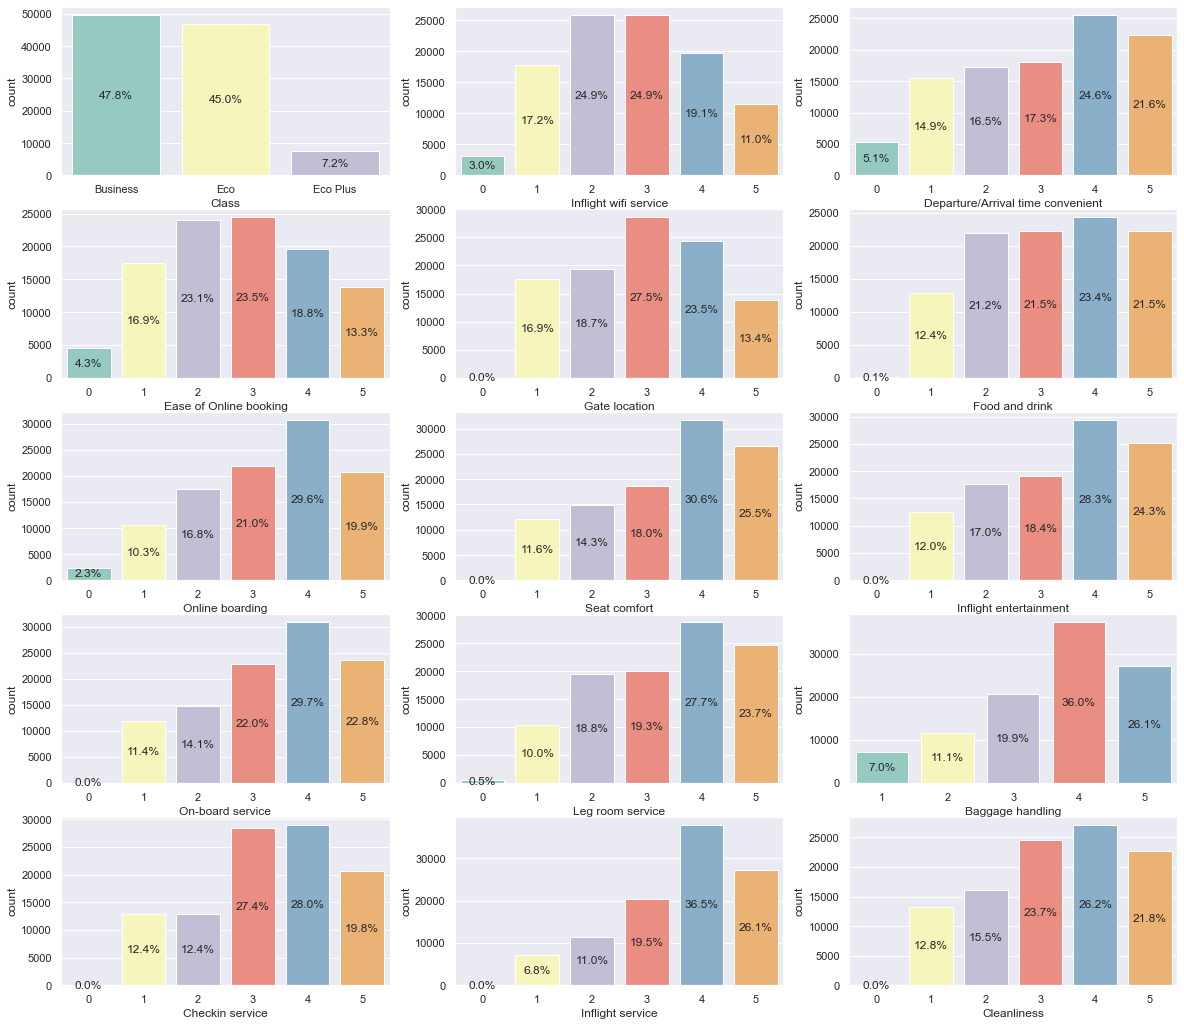

In [13]:
myModule.Utilis().plot_features(X_train,ordinal_cols)

- Environ 50% des clients voyagent en classe Affaire. Précédement on avait remarqué que la majorité des voyages étaient pour raison professionnelles. Il faudra investiguer si ces deux variables sont correlées. 
- Concernant les services proposés par la companie:
* Près de la moitié des clients jugent le service Wifi à bord plutôt moyen avec une note donnée entre 2 ou 3 étoiles
* La propreté, la gestion des baggages, les services à bord ainsi que les espacements pour les jambes ont reçu au moins 4 étoiles pour environ la moitié des clients interrogés.
           

### Analyse des variables numériques

Le tableau ci-dessus va nous permettre d'analyser la distribution des 4 variables numériques et d'analyser la présence ou non d'outliers qu'il faudra traiter avant de modéliser.
Compte tenu des échelles différentes, un scaling de ces variables sera utilisé dans le pipeline ainsi que l'imputation pour la variable *Arrival Delay in Minutes*.

L'âge des répondants s'étend de 7 à 85 ans avec un âge médian estimé à 40 ans.
La majorité des vols n'accuse pas de retard (au départ ou à l'arrivée) mais la valeur maximale enregistrée au départ et à l'arrivée est de plus de 26H.
Enfin, les vols sont plutôts des vols moyen-courrier avec une distance médianne de 843 Km parcourus.

In [14]:
X_train.describe()

Age  Flight Distance  Departure Delay in Minutes  \
count  103904.000000    103904.000000               103904.000000   
mean       39.379706      1189.448375                   14.815618   
std        15.114964       997.147281                   38.230901   
min         7.000000        31.000000                    0.000000   
25%        27.000000       414.000000                    0.000000   
50%        40.000000       843.000000                    0.000000   
75%        51.000000      1743.000000                   12.000000   
max        85.000000      4983.000000                 1592.000000   

       Arrival Delay in Minutes  
count             103594.000000  
mean                  15.178678  
std                   38.698682  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                   13.000000  
max                 1584.000000

### Partie II : Analyse Bi-variée

### II.1 Corrélation Plot

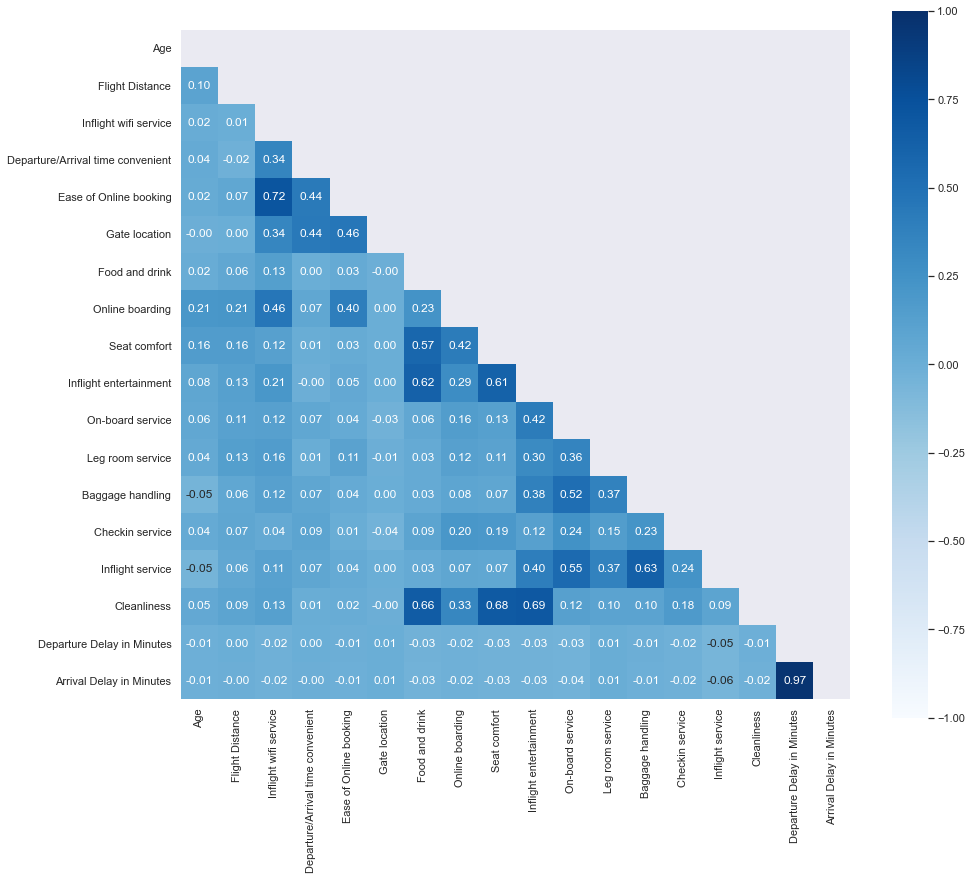

In [15]:
fig = plt.figure(figsize=[15,13])
corr_data = X_train.copy()
categorical_indexes = list(range(6,20))
#categorical_indexes
corr_data .iloc[:,categorical_indexes] = corr_data .iloc[:,categorical_indexes].astype("int64")
corr = corr_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, square = True, cmap='Blues', annot= True,vmax = 1, vmin=-1,fmt='0.2f', mask=mask)
plt.show()

Les variables **Départue Delay in Minutes** et **Arrival Delay in Minutes** sont très fortement correlées (coefficient de correlation de 97%).
Cela n'est pas surprenant compte tenu du fait que si des retards sont accusés au départ cela aura aussi une répercussion à l'arrivée.<br>
On note également une corrélation positive pour les variable suivantes:
- Ease of online booking et Inflight wifi service (.72), Cleanliness et Food and drink, Seat comfort, et Inflight entertainment (.66, .68 et .69), Inflight entertainment et Food and drink, Seat comfort (.62 et .61)
<br>Pas de correlation pour les autres variables.

### II.2: Corrélations variables/target

#### Variables catégorielles

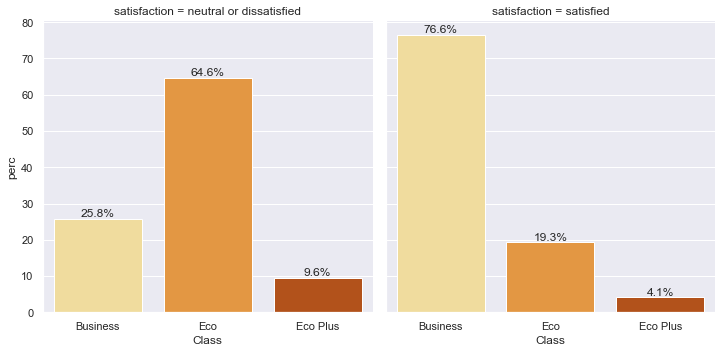

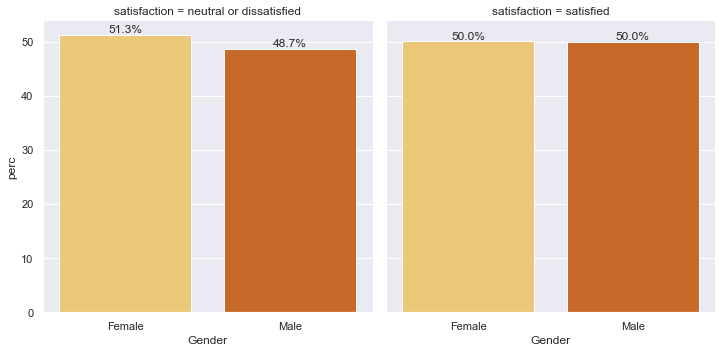

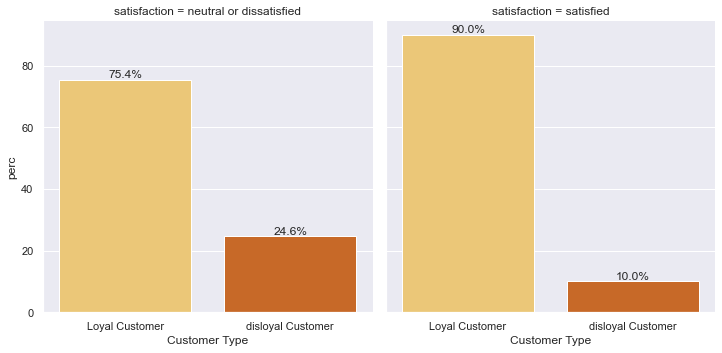

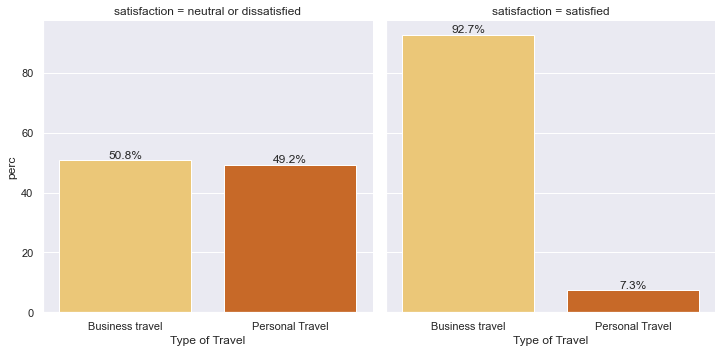

In [16]:
myModule.Utilis().plot_group_features("Class",new_df_train) 
myModule.Utilis().plot_group_features("Gender",new_df_train)
myModule.Utilis().plot_group_features('Customer Type',new_df_train)
myModule.Utilis().plot_group_features('Type of Travel',new_df_train)

#### Services proposés par la compagnie

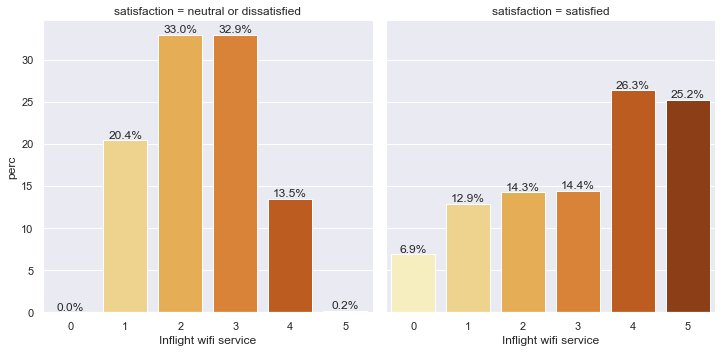

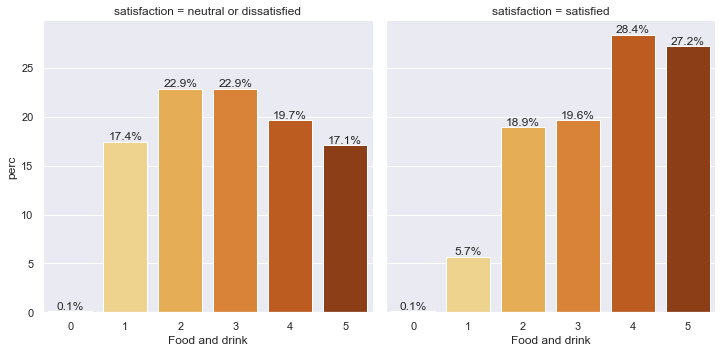

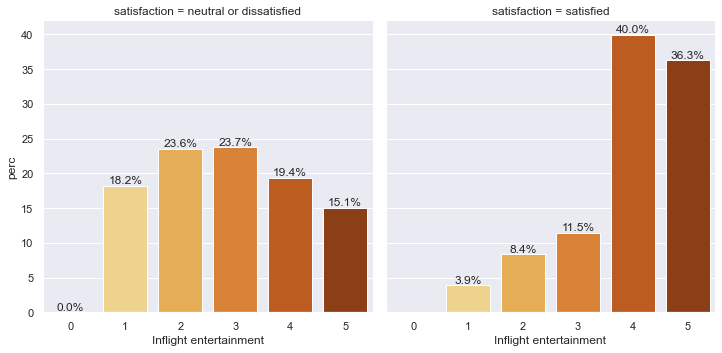

In [17]:
myModule.Utilis().plot_group_features('Inflight wifi service',new_df_train) 
myModule.Utilis().plot_group_features('Food and drink',new_df_train) 
myModule.Utilis().plot_group_features('Inflight entertainment',new_df_train) 

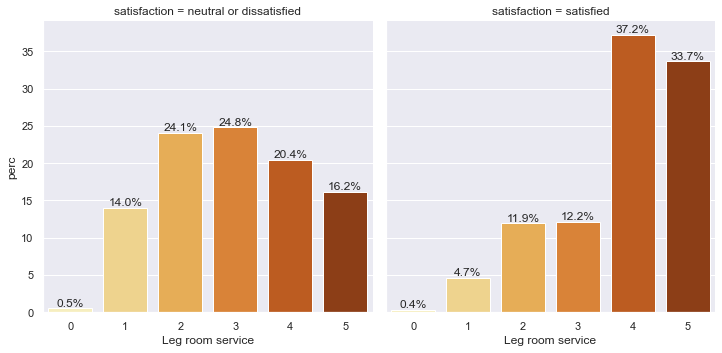

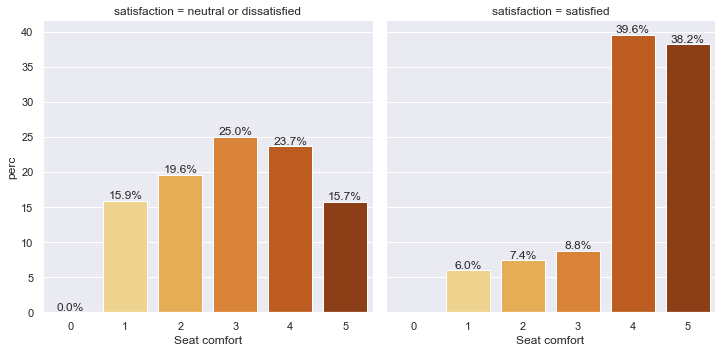

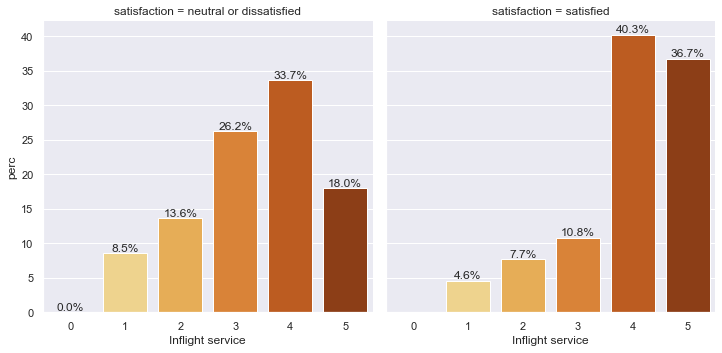

In [18]:
myModule.Utilis().plot_group_features('Leg room service',new_df_train) 
myModule.Utilis().plot_group_features('Seat comfort',new_df_train) 
myModule.Utilis().plot_group_features('Inflight service',new_df_train) 

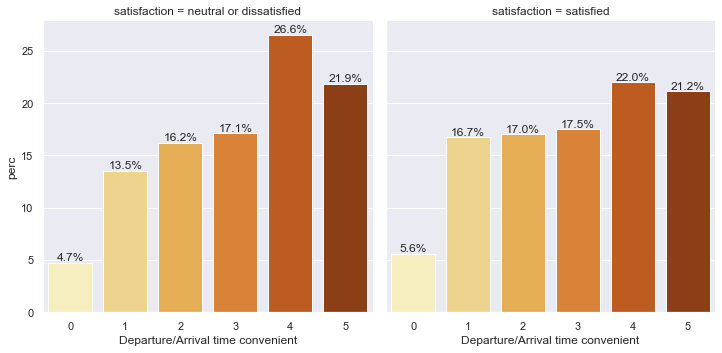

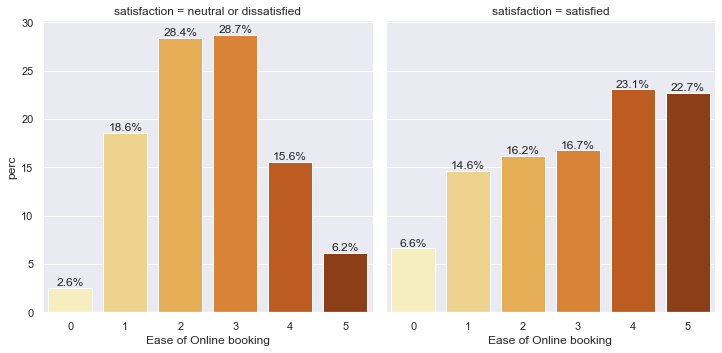

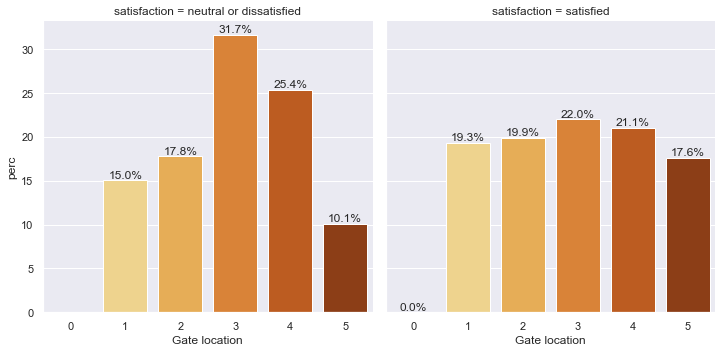

In [19]:
myModule.Utilis().plot_group_features('Departure/Arrival time convenient',new_df_train) 
myModule.Utilis().plot_group_features('Ease of Online booking',new_df_train) 
myModule.Utilis().plot_group_features('Gate location',new_df_train)

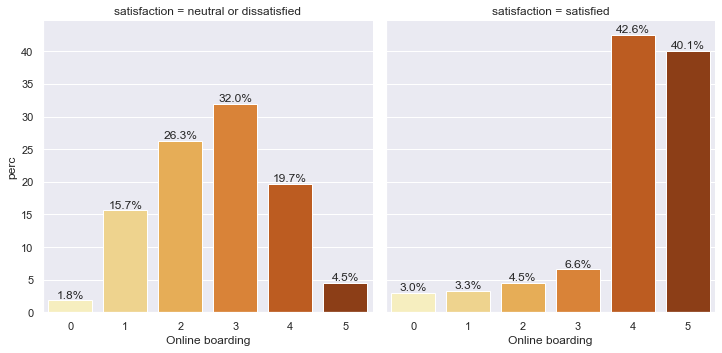

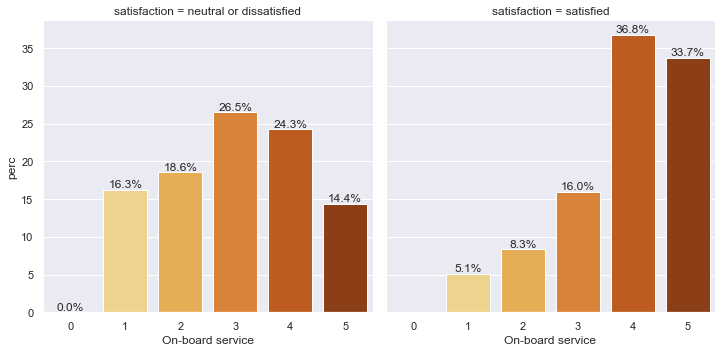

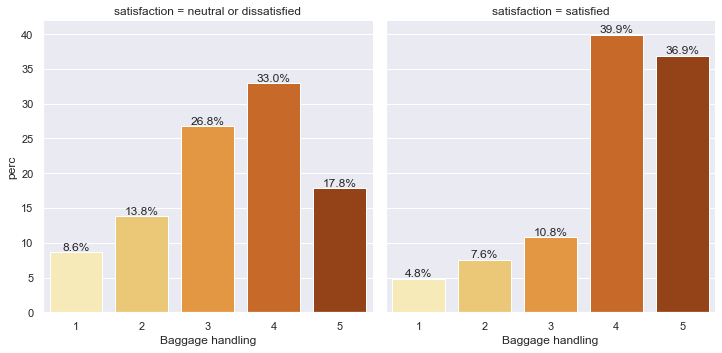

In [20]:
myModule.Utilis().plot_group_features('Online boarding',new_df_train) 
myModule.Utilis().plot_group_features('On-board service',new_df_train) 
myModule.Utilis().plot_group_features('Baggage handling',new_df_train) 

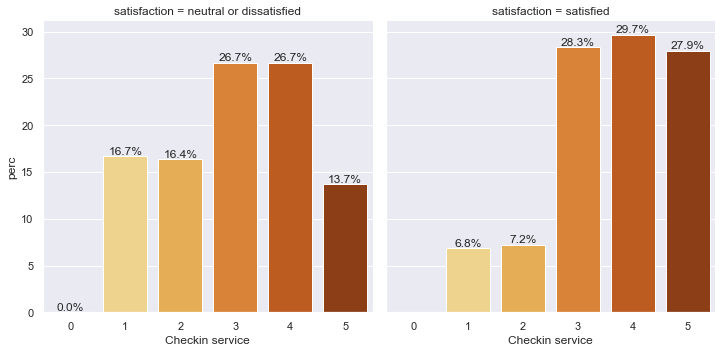

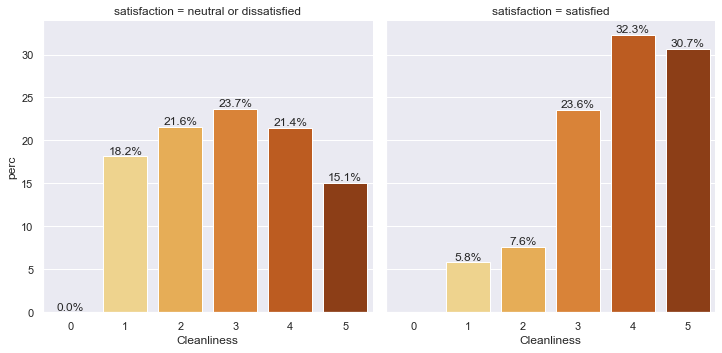

In [21]:
myModule.Utilis().plot_group_features('Checkin service',new_df_train) 
myModule.Utilis().plot_group_features('Cleanliness',new_df_train) 

#### Détails par âge, class et satisfaction

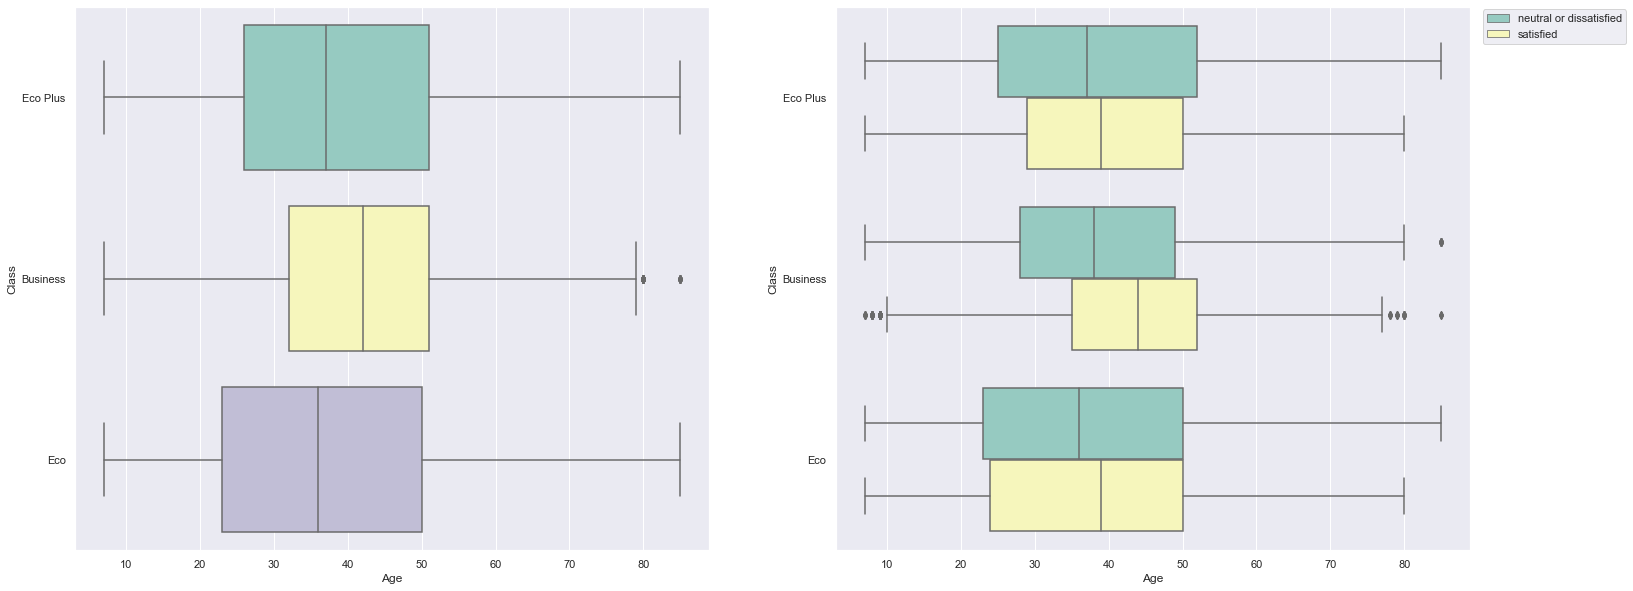

In [22]:
fig,ax = plt.subplots(1,2,figsize=(25,10))
sns.boxplot(ax = ax[0],x="Age", y="Class", data=new_df_train, palette="Set3", orient='h')
sns.boxplot(ax = ax[1],x="Age", y="Class", hue="satisfaction",data=new_df_train, palette="Set3", orient='h')

plt.legend(bbox_to_anchor=(1.02, 0.995), loc=2, borderaxespad=0.)
plt.show()

**Remarques Générales :** <br>
- La majorité des clients qui se trouve en classe Business sont plus âgés que ceux des classes économiques (**entre 30 et 50ans contre 20 et 50 pour les class Eco et Eco plus**) 
- Les clients qui ont voyagé en classe Economique et Economique Plus sont les plus insatisfaits de leur voyage en comparaison avec ceux qui ont voyagé en classe Business **avec près de 49 points d'écart** (**% d'insatisfaction estimée à 74.2 versus 25.8**)
- Proportion équilibrée entre les clients satisfaits/insatisfaits et ce quelque soit le genre (homme ou femme)
- Les clients qui voyagent pour des raisons professionnelles sont plus satisfaits 
- Les clients réguliers (Loyal customer) expriment à la fois une grande satisfaction et insatisfaction
- Plus les services proposés par la compagnie sont très bien notés (notes au moins égales à 4 étoiles), meilleure est la satisfaction du client.

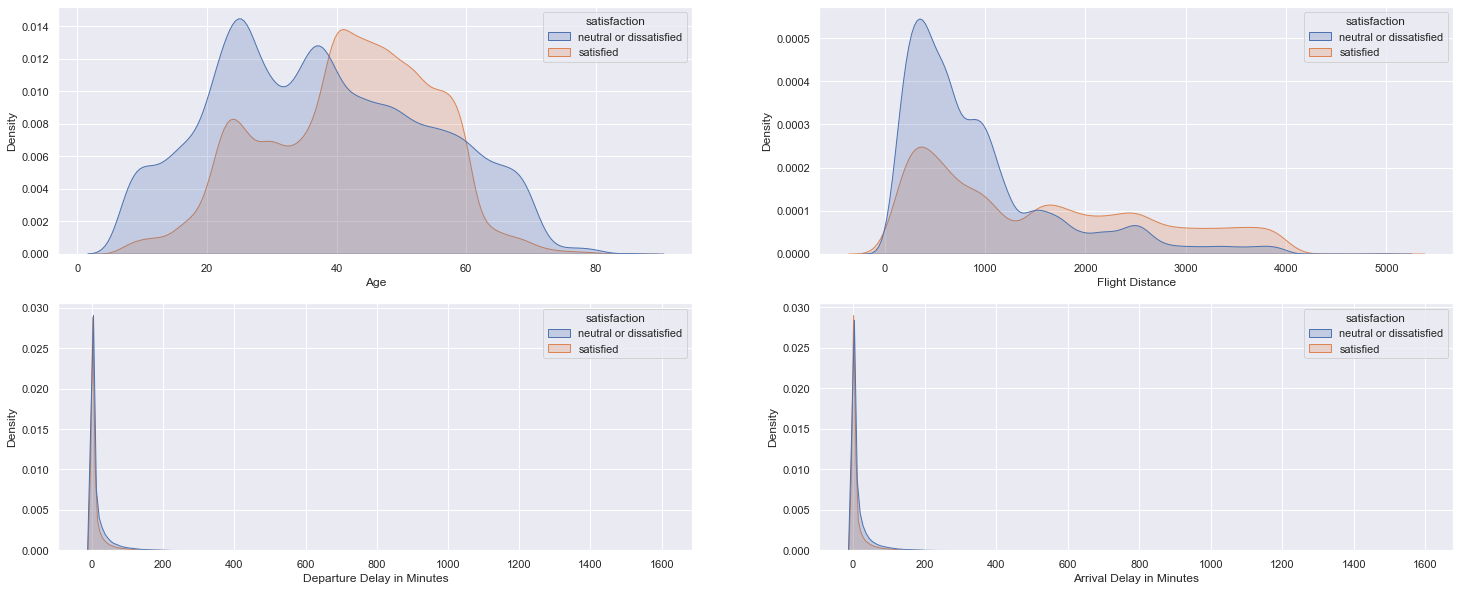

In [23]:
fig,ax = plt.subplots(2,2,figsize=(25,10))
count=0
for i in range(2):
    for j in range(2):
        sns.kdeplot(ax =ax[i][j], x=numerical_cols[count], hue="satisfaction", data=new_df_train, shade = True)
        count+=1

plt.show()

**Remarques Générales**:
- Proportion de clients satisfaits qui s'accroient avec l'âge (moyenne des clients satisfaits estimée au alentour de 42 ans contre 38 ans pour les clients insatisfaits)
- La majorité des clients insatisfaits concerne des vols courts/moyens courriers. (ce qui ce confirme par les deux box-plots ci-dessous où on remarque que la majorité des clients qui voyagent en classe business concerne des voyages longs courriers).
- En ce qui concerne les retards enregistrés au départ et à l'arrivée, l'histogramme ne permet pas à première vue de savoir si une réelle différence existe entre la satisfaction et l'insatisfaction. (cf.tableau plot ci-dessous).

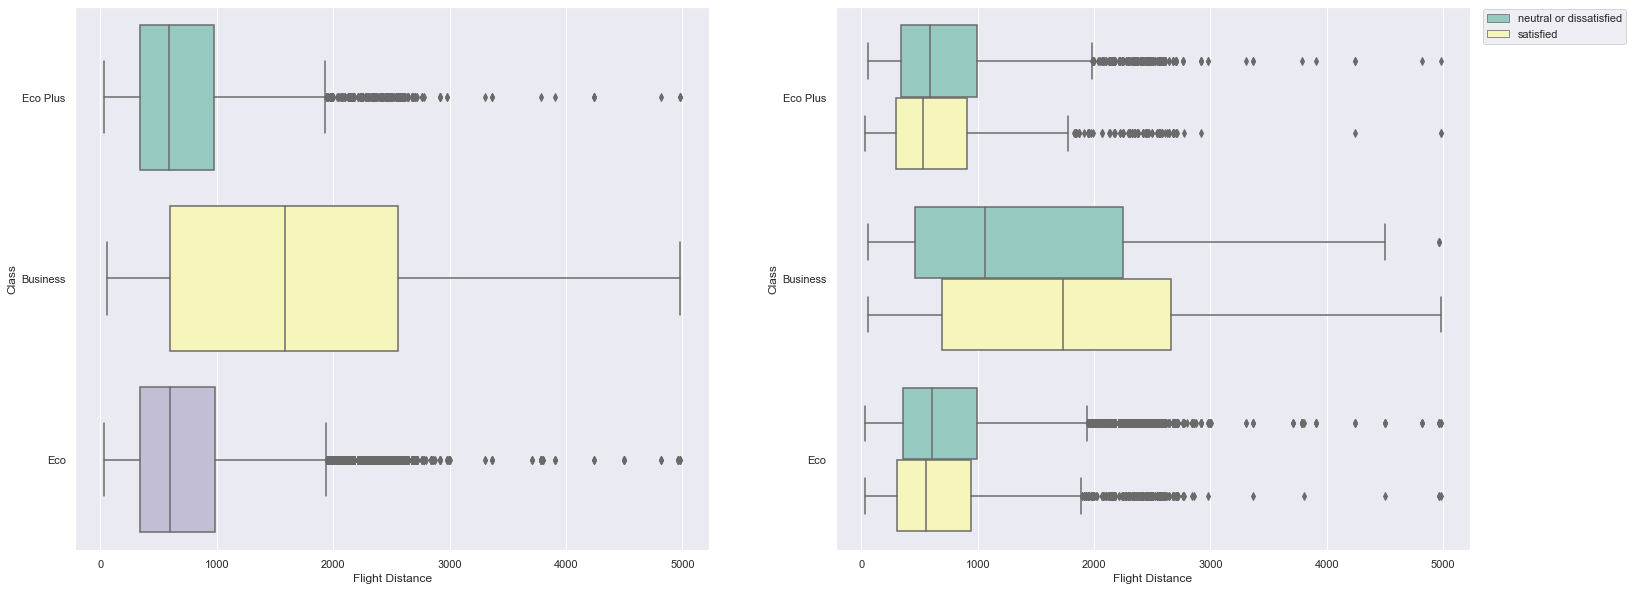

In [24]:
fig,ax = plt.subplots(1,2,figsize=(25,10))
sns.boxplot(ax =ax[0],x="Flight Distance", y="Class", data=new_df_train, palette="Set3", orient='h')
sns.boxplot(x="Flight Distance", y="Class", hue="satisfaction",data=new_df_train, palette="Set3", orient='h')
plt.legend(bbox_to_anchor=(1.02, 0.995), loc=2, borderaxespad=0.)
plt.show()

In [25]:
print("Arrival Delay In Minutes : Détails par type de satisfaction\n")
new_df_train[['Arrival Delay in Minutes','satisfaction']].groupby('satisfaction').describe().T

Arrival Delay In Minutes : Détails par type de satisfaction



satisfaction                    neutral or dissatisfied     satisfied
Arrival Delay in Minutes count             58697.000000  44897.000000
                         mean                 17.127536     12.630799
                         std                  40.560248     35.962008
                         min                   0.000000      0.000000
                         25%                   0.000000      0.000000
                         50%                   0.000000      0.000000
                         75%                  17.000000      8.000000
                         max                1584.000000   1280.000000

In [26]:
print("Departure Delay In Minutes : Détails par type de satisfaction\n")

new_df_train[['Departure Delay in Minutes','satisfaction']].groupby('satisfaction').describe().T

Departure Delay In Minutes : Détails par type de satisfaction



satisfaction                      neutral or dissatisfied     satisfied
Departure Delay in Minutes count             58879.000000  45025.000000
                           mean                 16.503728     12.608084
                           std                  40.191886     35.382595
                           min                   0.000000      0.000000
                           25%                   0.000000      0.000000
                           50%                   0.000000      0.000000
                           75%                  15.000000      9.000000
                           max                1592.000000   1305.000000

Plus le délai s'allonge, plus l'insatisfaction grandit

## Partie 3 : Prépocessing

### III.1 : Mapping de la variable à expliquer

Afin de pouvoir calibrer le modèle, on commence par ré-encoder la variable à expliquer en 0 (*neutral or dissatisfied) ou 1 (*satisfied)

In [27]:
y_train = y_train.map({'neutral or dissatisfied':0, 'satisfied':1} )
y_test = y_test.map({'neutral or dissatisfied':0, 'satisfied':1} )
y_train.iloc[:5]

0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

###  III.2 : Création du pipeline : Stratégies pour encoder les variables 

In [28]:
# copie de la base d'entraînement et de test pour la partie pré-processing

test_X_train = X_train.copy()
test_X_test = X_test.copy()

# définition des types de variables qui seront utilisées dans le pipeline
ordinal_cols, categorical_cols, numerical_cols = myModule.Utilis().define_cols(test_X_train)

#sanity check des variables
print('\033[1m' + "******************Sanity Check*****************\n" + '\033[0m')
print('\033[1m' + "Variables catégorielles : \n" + '\033[0m',categorical_cols) 
print("")
print('\033[1m' + "Variables ordinales : \n" + '\033[0m',ordinal_cols) 
print("")
print('\033[1m' + "Variables numériques : \n" + '\033[0m',numerical_cols) 

******************Sanity Check*****************

Variables catégorielles : 
 ['Gender', 'Customer Type', 'Type of Travel']

Variables ordinales : 
 ['Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

Variables numériques : 
 ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


###### Variables catégorielles

Pour encoder les variables ordinales et ainsi préserver l'ordre, on utilisera le module **OrdinalEncoder** du package *sklearn.prepocessing*. Par défaut, le mapping des catégories en nombre est arbitraire et ne tient pas compte de l'ordre de la variable. Pour tenir compte de cet ordre, on rajoute un paramètre *categories* qui mappe les catégories en respectant l'ordre.

Pour les autres variables catégorielles, le module **OneHotEncoder** sera utilisé.<br>
En ce qui concerne l'imputation de valeurs manquantes, cette méthode sera utilisée uniquement pour la variable numérique **Arrival Delay in Minutes** à l'aide du module SimpleImputer.

###### Variables numériques

Etant donné que les valeurs prises par les valeurs numériques sont sur des échelles différentes, on rajoutera la méthode StandardScaler afin de normaliser l'ensemble de ces variables sur une même échelle (variable centrée et réduite).<br>
Le Pipeline se décomposera comme suit :

In [29]:
# Note
#rerun the code to display the diagram


cats = list(np.array(["Eco","Eco Plus","Business"]).reshape(1,3))
del ordinal_cols[0] # suppression de la variable class qui sera définie dans le pipeline ci-dessous 
ordinal_cols = ordinal_cols # contient toutes les variables qui expriment la satisfaction du client (0 à 5)

categorical_preprocessor = myModule.Utilis().categorical_preprocessor()
ordinal_preprocessor = myModule.Utilis().ordinal_preprocessor(cats)
numerical_preprocessor = myModule.Utilis().numerical_preprocessor()
num_encoder = myModule.Utilis().num_encoder()

cols = categorical_cols + ["Class"] + ordinal_cols + numerical_cols # définition des différentes variables

# utilisation du module ColumnTransformer pour le pré-processing des variables avec des types mixtes
preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, categorical_cols),
        ("ordinal", ordinal_preprocessor, ["Class"]),
        ('ordinal_change_type', num_encoder, ordinal_cols),
        ("numerical", numerical_preprocessor, numerical_cols)
    ]
)

pipelines_baseline = Pipeline([
                     ('Pipeline Steps', preprocessor)
                    ])
    
    
set_config(display='diagram')
pipelines_baseline

Pipeline(steps=[('Pipeline Steps',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalhot',
                                                                   OrdinalEncoder(categories=[array(['Eco', 'Eco Plus', 'Business'], dtype='<U8')]))]),
                                                  ['Class']),
                                                 ('ordinal_change_type',
                                                  Pipeline(steps=[...
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness']),
                                                 ('numerical',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in '
                                                   'Minutes'])]))])

In [30]:
new_train_set = pipelines_baseline.fit_transform(test_X_train)
new_train_set = pd.DataFrame(new_train_set, columns = cols)

new_test_set = pipelines_baseline.transform(test_X_test)
new_test_set = pd.DataFrame(new_test_set, columns=cols)


new_train_set[:10]# sanity check, first 10 rows

Gender  Customer Type  Type of Travel  Class  Inflight wifi service  \
0     1.0            0.0             1.0    1.0                    3.0   
1     1.0            1.0             0.0    2.0                    3.0   
2     0.0            0.0             0.0    2.0                    2.0   
3     0.0            0.0             0.0    2.0                    2.0   
4     1.0            0.0             0.0    2.0                    3.0   
5     0.0            0.0             1.0    0.0                    3.0   
6     1.0            0.0             1.0    0.0                    2.0   
7     0.0            0.0             0.0    2.0                    4.0   
8     0.0            0.0             0.0    2.0                    1.0   
9     1.0            1.0             0.0    0.0                    3.0   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                4.0                     3.0            1.0   
1                                2.0                     3.0            3.0   
2                                2.0                     2.0            2.0   
3                                5.0                     5.0            5.0   
4                                3.0                     3.0            3.0   
5                                4.0                     2.0            1.0   
6                                4.0                     2.0            3.0   
7                                3.0                     4.0            4.0   
8                                2.0                     2.0            2.0   
9                                3.0                     3.0            4.0   

   Food and drink  Online boarding  ...  On-board service  Leg room service  \
0             5.0              3.0  ...               4.0               3.0   
1             1.0              3.0  ...               1.0               5.0   
2             5.0              5.0  ...               4.0               3.0   
3             2.0              2.0  ...               2.0               5.0   
4             4.0              5.0  ...               3.0               4.0   
5             1.0              2.0  ...               3.0               4.0   
6             2.0              2.0  ...               3.0               3.0   
7             5.0              5.0  ...               5.0               5.0   
8             4.0              3.0  ...               1.0               2.0   
9             2.0              3.0  ...               2.0               3.0   

   Baggage handling  Checkin service  Inflight service  Cleanliness       Age  \
0               4.0              4.0               5.0          5.0 -1.745279   
1               3.0              1.0               4.0          1.0 -0.951360   
2               4.0              4.0               4.0          5.0 -0.885200   
3               3.0              1.0               4.0          2.0 -0.951360   
4               4.0              3.0               3.0          3.0  1.430397   
5               4.0              4.0               4.0          1.0 -0.885200   
6               4.0              3.0               5.0          2.0  0.504158   
7               5.0              4.0               5.0          4.0  0.834958   
8               1.0              4.0               1.0          2.0  0.107199   
9               4.0              4.0               3.0          2.0 -1.282160   

   Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  
0        -0.731539                    0.266393                  0.074169  
1        -0.957184                   -0.361375                 -0.236313  
2        -0.047584                   -0.387532                 -0.391554  
3        -0.629246                   -0.099805                 -0.158692  
4        -0.978244                   -0.387532                 -0.391554  
5        -0.009475                   -0.387532                 -0.391554  
6         0.086800             

In [31]:
new_test_set[:10]# sanity check base de test

Gender  Customer Type  Type of Travel  Class  Inflight wifi service  \
0     0.0            0.0             0.0    0.0                    5.0   
1     0.0            0.0             0.0    2.0                    1.0   
2     1.0            1.0             0.0    0.0                    2.0   
3     1.0            0.0             0.0    2.0                    0.0   
4     0.0            0.0             0.0    0.0                    2.0   
5     1.0            0.0             0.0    0.0                    3.0   
6     0.0            0.0             0.0    2.0                    5.0   
7     0.0            0.0             0.0    2.0                    2.0   
8     1.0            0.0             0.0    0.0                    5.0   
9     0.0            0.0             0.0    2.0                    2.0   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                4.0                     3.0            4.0   
1                                1.0                     3.0            1.0   
2                                0.0                     2.0            4.0   
3                                0.0                     0.0            2.0   
4                                3.0                     4.0            3.0   
5                                3.0                     3.0            3.0   
6                                5.0                     5.0            5.0   
7                                2.0                     2.0            2.0   
8                                2.0                     2.0            2.0   
9                                2.0                     2.0            2.0   

   Food and drink  Online boarding  ...  On-board service  Leg room service  \
0             3.0              4.0  ...               5.0               5.0   
1             5.0              4.0  ...               4.0               4.0   
2             2.0              2.0  ...               4.0               1.0   
3             3.0              4.0  ...               1.0               1.0   
4             4.0              1.0  ...               2.0               2.0   
5             5.0              5.0  ...               4.0               3.0   
6             3.0              5.0  ...               5.0               5.0   
7             4.0              4.0  ...               4.0               4.0   
8             5.0              5.0  ...               2.0               2.0   
9             3.0              4.0  ...               4.0               4.0   

   Baggage handling  Checkin service  Inflight service  Cleanliness       Age  \
0               5.0              2.0               5.0          5.0  0.834958   
1               4.0              3.0               4.0          5.0 -0.223601   
2               3.0              2.0               2.0          2.0 -1.282160   
3               1.0              3.0               1.0          4.0  0.305678   
4               2.0              4.0               2.0          4.0  0.636478   
5               1.0              1.0               2.0          5.0 -1.546800   
6               5.0              4.0               5.0          3.0  2.488956   
7               4.0              5.0               4.0          3.0  0.239518   
8               5.0              3.0               3.0          5.0  0.504158   
9               4.0              5.0               4.0          4.0  0.437998   

   Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  
0        -1.032398                    0.920317                  0.746880  
1         1.678348                   -0.387532                 -0.391554  
2        -1.000307                   -0.387532                 -0.391554  
3         2.193821                   -0.387532                 -0.236313  
4        -0.007470                   -0.387532                  0.125916  
5        -0.880966                   -0.387532                 -0.391554  
6         2.805569             

### III.3 : Baseline Model

In [32]:

models_names = ["Random Forest", "Gradient Boosting", "Logistic Regression"]
# Contient les trois pipelines (une pour chaque modèle)
model_baseline = [
  Pipeline(steps=[('classifier', RandomForestClassifier(random_state=0))]),
  Pipeline(steps=[('classifier', GradientBoostingClassifier(random_state=0))]),
  Pipeline(steps=[('classifier', LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0))])
]



name_models, f1_score_models_train, f1_score_models_test,\
accuracy_score_models_train, accuracy_score_models_test,\
precision_score_models_train, precision_score_models_test,\
recall_score_models_train, recall_score_models_test= [], [], [], [],[],[],[],[],[]
final_df = pd.DataFrame(columns=["Models","F1-Score-train","F1-Score-test",\
                                 "Accuracy-Score-train","Accuracy-Score-test",\
                                 "Precision-Score-train","Precision-Score-test",\
                                 "Recall-Score-train","Recall-Score-test"
                                ])

    
    
name_models, f1_score_models_train, f1_score_models_test, accuracy_score_models_test, accuracy_score_models_train,\
precision_score_models_test, precision_score_models_train,\
recall_score_models_test, recall_score_models_train =  myModule.Utilis().metrics_classifier(model_baseline,models_names,new_train_set,y_train,new_test_set,y_test)   
    

final_df["Models"] = name_models
final_df["F1-Score-train"] = f1_score_models_train
final_df["F1-Score-test"] = f1_score_models_test

final_df["Accuracy-Score-train"] = accuracy_score_models_train
final_df["Accuracy-Score-test"] = accuracy_score_models_test

final_df["Precision-Score-train"] = precision_score_models_train
final_df["Precision-Score-test"] = precision_score_models_test

final_df["Recall-Score-train"] =recall_score_models_train
final_df["Recall-Score-test"] = recall_score_models_test

final_df

Models F1-Score-train F1-Score-test Accuracy-Score-train  \
0        Random Forest         100.0%         95.7%               100.0%   
1    Gradient Boosting          93.2%         93.2%                94.2%   
2  Logistic Regression          85.3%         85.0%                87.5%   

  Accuracy-Score-test Precision-Score-train Precision-Score-test  \
0               96.3%                100.0%                97.2%   
1               94.1%                 94.4%                94.5%   
2               87.1%                 87.0%                86.8%   

  Recall-Score-train Recall-Score-test  
0             100.0%             94.1%  
1              92.0%             92.0%  
2              83.6%             83.3%

**Remarques Générales :**

Parmi les 3 classifiers, Random Forest obtient les meilleures performances (**erreur sur le test set à 3.7%**).<br>
Cependant, on constate que le modèle de RandomForest induit un sur - apprentissage (**overfitting**).<br>
Le modèle s'est trop perfectionné sur la base d'apprentissage (accuracy de 100%) mais a perdu tout sens de généralisation lorsque on l'a évalué sur des nouvelles données.<br> 

La performance du modèle est ainsi dégradée, ce qui est confirmée par le graphique de *validation curve* ci-dessous.

On remarque également dans ce graphique que la performance du modèle tend à se stabiliser à partir de 20 arbres.

L'outil de Validation Curve dans Scikit-Learn permet de diagnostiquer les situations de overfitting vs underfitting en traçant l'influence d'un hyperparamètre et de comparer les scores dans la base d'entraînement et de validation grâce à la cross-validation.

**Validation Curve (Modèle de Random Forest):**


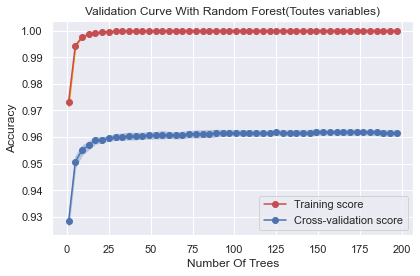

In [33]:
from sklearn.model_selection import validation_curve

# Create range of values for parameter
param_range = np.arange(1, 200, 4)


# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(random_state=0), 
                                             new_train_set, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean,"o-", color="r", label="Training score")
plt.plot(param_range, test_mean, "o-", color="b", label="Cross-validation score")

# Plot accuracy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="orange")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="lightsteelblue")

# Create plot
plt.title("Validation Curve With Random Forest(Toutes variables)")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

Dans la partie suivante on s'intéressera à la partie **hypertuning** pour l'estimateur de RandomForest et ainsi à la sélection en amont des features les plus discriminants.

**Conclusions des parties 1, 2 et 3:**

- Dataset plus ou moins équilibré concernant la variable à expliquer (56.7 % vs 43.3%) à la fois dans la base d'entraînement et de test
- Proportion de répondants et de répondantes équilibrée
- La majorité des clients sont des clients réguliers de la compagnie 
- 69% des voyages sont des voyages d'affaires et près d'un client interrogé sur 2 a voyagé en classe Business


Concernant les services notés par les clients:
- 62.1% des passagers ont été satisfaits du transport de leur baggage (avec une note d'au moins 4 étoiles)
- Plus de la moitié des passagers ont exprimé une très grande satisfaction sur le confort des sièges
- Les variables 'Departure delay in minutes' et 'Arrival delay in minutes' sont très fortement corrélées (96%)
- La majorité des clients qui ont voyagé en classe Economique et Economique plus ont été les plus insatisfaits de leur voyage en comparaison avec les clients qui ont voyagé en classe Business
- Les clients qui voyagent en classe Buisness ont tendance à voyager sur des vols long-courrier et plus le vol est long, meilleure est leur satisfaction concernant les services "in-flight entertainment" et "extra legroom"
- Les clients qui voyagent en classe Affaire sont plus âgés que les clients qui voyagent en classe économique <br>

**Pipeline et Baseline Model:**

Notre pipeline se décompose en 3 parties: 
- définition du type des variables, 
- pré-processing des variables selon leur types 
- comparaison de 3 classifiers.<br>

En ce qui concerne les classifiers, Random Forest obtient la meilleure performance au vu des métriques analysées et c'est ce modèle que nous utiliserons dans la partie suivante.<br>
Cependant, il sera nécessaire de procéder à la recherche des hyperparametres optimaux afin d'éviter le sur - apprentissage et d'obtenir un modèle avec un bon pouvoir prédictif. <br>
Pour cela, la stratégie sera d'abord:
- de reprendre les opérations pour chaque type de variable (comme fait précédemment)
- d'effectuer une sélection de variables (feature selection) étant donné le nombre de variables (23 au total) et de déterminer lequel(s) a/ont un impact sur la variable à expliquer
- de tester une grille de valeurs pour chaque hyperparametre (à travers un RandomizedSearch) et de trouver les combinaisions optimales qui maximisera l'accuracy.
- de re-entraîner le modèle sur la combinaison de ces paramètres optimaux et de comparer les résultats obtenus dans la base d'entraînement et de test
- de tracer la validation curve 






### Partie 4 : Hypertuning et Feature Selection


### Importance Feature Selection 

On définit le processus de Feature Selection par la sélection des variables qui apportent le plus de pouvoir significatif au modèle prédictif.<br>
Dans le cas où ce processus n'est pas effectué des problèmes peuvent apparaître du fait:
- D'allouer des ressources supplémentaires du fait de la présence de plusieurs variables
- Que des variables non significatives jouent le rôle de bruit et peuvent impacter la performance du modèle
- Que plus de temps sera nécessaire pour entraîner le modèle<br>

Scikit-learn offre à travers le module de feature selection la possibilité d'utiliser plusieurs méthodes qui peuvent être réparties en 3 catégories:
- filters methods,
- wrapper methods, 
- embedded methods

**Filter methods :**

Chaque variable se voit assigner un score par le biais de méthodes statistiques (ex. Chi-2 test) qui vont permettre de retirer celles qui ont un pouvoir non significatif.
**Plus le score est élevé, plus la variable est importante**.<br>
On peut citer comme méthode :
- **VarianceThreshold**: supprime les variables dont la variance est inférieure à une valeur seuil (fixée en amont)
- **Mutual Info Classifier** : Pour chaque variable, on calcule l'information mutuelle [<sup id="fn2-back">1</sup>](#fn2 "footnote and tooltip 2") avec la variable à expliquer. Les variables sélectionnées sont celles qui possèdent l'information mutuelle la plus élevée. En d'autres termes, il mesure la dépendance entre les variables et la variable à expliquer.
-**SeleckKBest** : Approche plus générale que les deux méthodes précédemment mentionnées, et peut-être vu comme un *wrapper* qui prend en paramètre une fonction de scoring (e.g. chi-2, mutual_info_classif,...). Sélectionne les K variables dont le score du test de dépendance avec la variable à prédire est le plus élevée. En entrée on spécifie le paramètre k qui sélectionne les K variables les plus pertinentes. 

**Wrapper methods (Recursive Feature Elimination) :**

Méthode qui utilise une approche itérative pour réduire le set de variables jusqu'à l'obtention d'un subset de features optimal (spécifié dans le paramètre threshold).

A la différence de la méthode exposée ci-dessus, ces méthodes doivent être utilisées avec un modèle. Au début, toutes les variables sont considérées, et chaque feature se voit assigner un score d'importance. Ceux dont le score est faible, sont retirés et le processus d'itération est répété jusqu'à l'obtenion du subset final (i.e correspond au nombre de variables définies dans le paramètre threshold).

**Embedded methods :**

Méthodes qui se concentrent sur les variables qui contribuent fortement à l'accuracy du modèle lorsque celui-ci est crée.
Ces méthodes possèdent déjà des fonctions de feature importance et incluent une étape de sélection de variables lors de la phase d'entraînement du modèle.<br>

Dans Scikit-Learn, le transformer **SelectFromModel** implémente cette méthode. La principale différence avec "Wrapper Methods" est que le nombre optimal de variables final n'est pas obligé d'être spécifié. Les variables sont supprimées si leurs coefficients (dans le cas des modèles linéaires) ou de feature importance (arbres de décison par exemple) sont en-dessous d'une valeur seuil (moyenne ou médiane par exemple).<br>
En d'autres termes, SelectFromModel entraîne un estimateur puis sélectionne les variables les plus importantes pour cet estimateur. 

Dans ce qui suit, on combinera les méthodes mutual info classif et SelectKBest pour la sélection des variables les plus pertinentes.

[<sup id="fn2">1</sup>](#fn2-back) l'information mutuelle de deux variables aléatoires est une quantité mesurant la dépendance statistique de ces variables. 

###  IV.1 : Feature Selection

Le pipeline de feature selection se composera des deux méthodes suivantes : mutual info classif et SelectKBest.<br>
On commence d'abord par tracer le plot de feature importance afin de sélectionner uniquement les variables qui apportent de l'information par rapport à la variable à expliquer. <br> 
Cette pré-selection sera ensuite appelée dans la méthode SelectKbest afin de ne retenir que les variables pertinentes.


In [34]:
def feature_score(df,y):
    features_name, features_score = [],[]
    feature_scores = mutual_info_classif(df,y, random_state=0)
    for score, f_name in sorted(zip(feature_scores, df.columns), reverse=True):
        
        features_name.append(f_name)
        features_score.append(score)
    df_mutual = pd.DataFrame(columns=["Features", "Score"])
    df_mutual["Features"] = features_name
    df_mutual["Score"] = features_score
    return df_mutual

#Print Dataframe with each feature associated with score importance

feat_imp = feature_score(new_train_set,y_train)


In [35]:
def feature_importance_plot(nb_features=22):
    
       
    sns.barplot(x = feat_imp.iloc[:nb_features]["Score"],\
            y = feat_imp.iloc[:nb_features]["Features"],\
            palette="Set3"
          )
    plt.title("Importance des variables sur la satisfaction des passagers")
    plt.show()


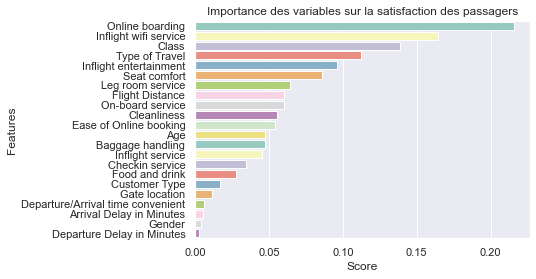

In [36]:
feature_importance_plot()

**Commentaires :**

Les variables OnlineBoarding, Inflight wifi service, Class, Type of Travel, Inflight entertainment, Seat comfort sont les variables les plus discriminantes. <br>
En revanche, Customer Type, Gate Location, Departure/Arrival Time convenient, Gender et Departure Delay in Minutes n'ont aucun impact sur la satisfaction du client.<br>
Dans ce qui suit on va prendre les **6 variables les plus importantes** et l'appliquer dans la méthode SelectKBest avant de passer à la modélisation.

**Points d'amélioration :** 

Dans l'optique de sélectionner le nombre de variables optimal on aurait pu également tracer l'évolution de l'accuracy dans la base d'entraînement et de test et de choisir celui qui maximise cette métrique tout en évitant l'overfitting.


### IV.2 : Hyperparameters

Les hyper parametres doivent être définis en amont de la phase d'entraînement à la différence des paramètres du model qui sont estimés durant l'entraînement du model.<br>

Pour l'estimateur de RandomForest plusieurs hyperparametres existent (nombre d'arbres, max features, critère,...) et Scikit-Learn utilise par défaut un set d'hyperparametres qui peut s'avérer dans certains cas pas optimal pour le problème qu'on souhaite analyser. C'est pourquoi on procède à la recherche des hyperparametres optimaux (**tuning hyperparameters**).<br>
Pour réaliser cette recherche de paramètres, plusieurs options s'offrent à nous dans Scikit-Learn : <br>
- GridSearchCv
- RandomizedSearchCV

GridSearchCV construit une grille de modèles en analysant toutes les combinaisons des paramètres (explicités dans param_grid) qu'on souhaite tester alors que RandomizedSearchCV réalise une recherche aléatoire sur l'ensemble de ces paramètres.
Toutes les valeurs des paramètres ne sont donc pas toutes testées, mais seulement un nombre fixe est échantillonné à partir des distributions spécifiées (spécifié via le paramètre n_iter). 

Une recherche d'hyperparametres contient les éléments suivants:
- un estimateur (exemple RandomForest)
- un dictonnaire de valeurs à tester 
- une fonction de scoring (accuracy utilisée pour les problèmes de classification et r2 score pour la régression)
- cross-validation stratégie (par défaut 5 K-fold cross validation)

### K-Fold Cross Validation 

En pratique dans les problèmes de machine learning supervisés, le jeu de données est divisée en 2 parties : 
- Une base d'entraînement qui va permettre d'estimer les paramètres du modèle;
- Une base de test qui n'a pas été utilisée pendant la phase d'entraînement et qu'on utilisera pour évaluer les performances du modèle et analyser son pouvoir de généralisation sur des nouvelles données.

Cela a pour objectif notamment d'éviter les problèmes d'overfitting (modèle qui généralise parfaitement sur la base d'entraînement mais dont les performances sont fortement dégradées dans la base de test).


Cependant,lorsque  on évalue différentes valeurs des hyperparametres, un risque d'overfitting peut survenir sur la base de test. C'est pourquoi on split entre train/validation/test, et c'est sur la base de validation que la recherche des hyperparametres sera réalisée avant de tester la performance sur la base de test.

Un désavantage de cette méthode est qu'on réduit le nombre d'examples dans la base d'entraînement et en règle générale on préfère utiliser une validation croisée. Dans ce cas-là on aura toujours une base d'entraînement/base de test, mais la base d'entraînement est décomposée en k partitions, et le modèle est entraîné sur les k-1 et tester sur la kème partition.



### IV.3 : Pipeline Final

In [37]:
# copie de la base d'entraînement et de test pour la partie pré-processing

final_X_train = X_train.copy()
final_X_test = X_test.copy()

# définition des types de variables qui seront utilisées dans le pipeline
ordinal_cols, categorical_cols, numerical_cols = myModule.Utilis().define_cols(final_X_train)
print(categorical_cols) #sanity check des variables 

['Gender', 'Customer Type', 'Type of Travel']


In [38]:
# re run to display the diagram

seed = np.random.seed(22)
rng = np.random.RandomState(1)


cats = list(np.array(["Eco","Eco Plus","Business"]).reshape(1,3))
del ordinal_cols[0] # suppression de la variable class qui sera définie dans le pipeline ci-dessous 
ordinal_cols = ordinal_cols # contient toutes les variables qui expriment la satisfaction du client (0 à 5)

categorical_preprocessor = myModule.Utilis().categorical_preprocessor()
ordinal_preprocessor = myModule.Utilis().ordinal_preprocessor(cats)
numerical_preprocessor = myModule.Utilis().numerical_preprocessor()
num_encoder = myModule.Utilis().num_encoder()

cols = categorical_cols + ["Class"] + ordinal_cols + numerical_cols # définition des différentes variables

# utilisation du module ColumnTransformer pour le pré-processing des variables avec des types mixtes
preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, categorical_cols),
        ("ordinal", ordinal_preprocessor, ["Class"]),
        ('ordinal_change_type', num_encoder, ordinal_cols),
        ("numerical", numerical_preprocessor, numerical_cols)
        
    ]
)


pipelines = Pipeline([
                     ('Pipeline Steps', preprocessor),
                     ('selector', SelectKBest(mutual_info_classif, k=6)),
                     ('Classifier',RandomForestClassifier(random_state = rng))
                     
    
                    ])
    
    
# define parameters range
# rerun to display Pipeline operations

n_estimators = range(64,128,2)
criterion = ["gini", "entropy"]
max_features = ['auto', 'sqrt']
max_depth = range(2,20,1)
min_samples_leaf = range(1,10,1)
min_samples_split = range(2,10,1)


# Create the random grid
random_grid = {'Classifier__n_estimators': n_estimators,
               'Classifier__max_features': max_features,
               'Classifier__max_depth': max_depth,
               'Classifier__min_samples_split': min_samples_split,
               'Classifier__min_samples_leaf': min_samples_leaf,
               'Classifier__criterion' : criterion
               }


# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(pipelines, random_grid, n_iter = 5, cv = 5, verbose=2, n_jobs = -1, scoring="accuracy",random_state = rng)

rf_random.fit(final_X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('Pipeline Steps',
                                              ColumnTransformer(transformers=[('categorical',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['Gender',
                                                                                'Customer '
                                                                                'Type',
                                                                                'Type '
                                                                                'of '
                                                                                'Travel']),
                                                                              ('ordinal',
                                                                               Pipeline(steps=[('ordinalhot',
                                                                                                OrdinalEncoder(categories=[array(['Eco', 'Eco Plus', 'Business'], dtype='<U8')]))]),
                                                                               ['Class'])...
                   param_distributions={'Classifier__criterion': ['gini',
                                                                  'entropy'],
                                        'Classifier__max_depth': range(2, 20),
                                        'Classifier__max_features': ['auto',
                                                                     'sqrt'],
                                        'Classifier__min_samples_leaf': range(1, 10),
                                        'Classifier__min_samples_split': range(2, 10),
                                        'Classifier__n_estimators': range(64, 128, 2)},
                   random_state=RandomState(MT19937) at 0x1F752A03740,
                   scoring='accuracy', verbose=2)

In [39]:
print("*******************Résultats RandomizedSearchCV************\n")

print ('Best score: %0.2f' % rf_random.best_score_)
best_parameters = rf_random.best_params_
print('Best set of hyperparameters : \n',best_parameters)



*******************Résultats RandomizedSearchCV************

Best score: 0.93
Best set of hyperparameters : 
 {'Classifier__n_estimators': 74, 'Classifier__min_samples_split': 6, 'Classifier__min_samples_leaf': 8, 'Classifier__max_features': 'sqrt', 'Classifier__max_depth': 17, 'Classifier__criterion': 'gini'}


### Remarques Générales :

La recherche des hyperparametres optimaux indique que l'accuracy (93%) est maximisée avec les paramètres suivants :
- nombre d'arbres : 74
- critère : Gini
- min sample split : 6
- min sample leaf : 8
- max features : sqrt
- max depth : 17


In [40]:
# prediction 
best_random = rf_random.best_estimator_
y_pred = best_random.predict(final_X_test)

y_pred_train = best_random.predict(final_X_train)



In [41]:
# sanity check overfitting

print("*******************Comparaison Train/Test : metriques************\n")

print("F1 Test set = {:2.1f}%".format(f1_score(y_test, y_pred) * 100))
print("F1 Train set = {:2.1f}%".format(f1_score(y_train, y_pred_train) * 100))

print("Accuracy Test set = {:2.1f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Accuracy Train set = {:2.1f}%".format(accuracy_score(y_train, y_pred_train) * 100))

print("Precision Test set = {:2.1f}%".format(precision_score(y_test, y_pred) * 100))
print("Precison Train set = {:2.1f}%".format(precision_score(y_train, y_pred_train) * 100))

print("Recall Test set = {:2.1f}%".format(recall_score(y_test, y_pred) * 100))
print("Recall Train set = {:2.1f}%".format(recall_score(y_train, y_pred_train) * 100))

*******************Comparaison Train/Test : metriques************

F1 Test set = 92.2%
F1 Train set = 92.3%
Accuracy Test set = 93.3%
Accuracy Train set = 93.4%
Precision Test set = 93.6%
Precison Train set = 93.3%
Recall Test set = 91.0%
Recall Train set = 91.2%


### Remarques Générales:

L'analyse des métriques (accuracy, precision, recall, F1-score) à la fois dans la base d'entraînement et de test indique que la performance du modèle sur la base de test est similaire à la base d'entraînement et de ce fait la performance n'est pas dégradée. La precision est même améliorée sur la base de test.<br>
Dans ce qui suit, on analysera:
- la validation curve
- la matrice de confusion ainsi que les erreurs effectuées par l'estimateur 

On comparera aussi le modèle incluant toutes les variables avec les mêmes hyperparametres optimaux trouvés lors du RandomizedSearch et comparer sa performance avec le modèle réduit aux variables les plus discriminantes.


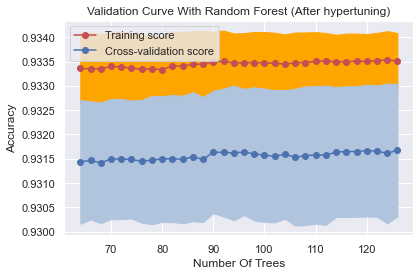

In [42]:
from sklearn.model_selection import validation_curve

# Create range of values for parameter
param_range = np.arange(64,128,2)

# Calculate accuracy on training and test set using range of parameter values

train_scores, test_scores = validation_curve(estimator=best_random,
                                             X=final_X_train,
                                             y=y_train, 
                                             param_name="Classifier__n_estimators", 
                                             param_range=param_range,
                                             cv=3, scoring="accuracy", n_jobs=-1)
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean,"o-", color="r", label="Training score")
plt.plot(param_range, test_mean, "o-", color="b", label="Cross-validation score")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="orange")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="lightsteelblue")

# Create plot
plt.title("Validation Curve With Random Forest (After hypertuning)")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

### Modèle incluant toutes les variables 

In [43]:
#test RF ttes variables avec ses nvx parametres
final_X_train_full = X_train.copy()
final_X_test_full = X_test.copy()

# définition des types de variables qui seront utilisées dans le pipeline
ordinal_cols, categorical_cols, numerical_cols = myModule.Utilis().define_cols(final_X_train_full)

dic_test = {'n_estimators': 74,
            'min_samples_split': 6,
            'min_samples_leaf': 8,
            'max_features': 'sqrt',
            'max_depth': 17,
            'criterion': 'gini'}
model_rf_full = RandomForestClassifier(**dic_test,random_state = rng)
model_rf_full.get_params()

##re-training with full pipeline
pipelines_full = Pipeline([
                     ('Pipeline Steps', preprocessor),
                     ('selector', SelectKBest(mutual_info_classif, k=22)),# modèle incluant toutes les variables
                     ('Classifier',model_rf_full)
                     
    
                    ])
pipelines_full.fit(final_X_train_full, y_train)


Pipeline(steps=[('Pipeline Steps',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalhot',
                                                                   OrdinalEncoder(categories=[array(['Eco', 'Eco Plus', 'Business'], dtype='<U8')]))]),
                                                  ['Class']),
                                                 ('ordinal_change_type',
                                                  Pipeline(steps=[...
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in '
                                                   'Minutes'])])),
                ('selector',
                 SelectKBest(k=22,
                             score_func=<function mutual_info_classif at 0x000001F75026E9D0>)),
                ('Classifier',
                 RandomForestClassifier(max_depth=17, max_features='sqrt',
                                        min_samples_leaf=8, min_samples_split=6,
                                        n_estimators=74,
                                        random_state=RandomState(MT19937) at 0x1F752A03740))])

In [45]:
y_pred_full = pipelines_full.predict(final_X_test_full)

y_pred_train_full = pipelines_full.predict(final_X_train_full)


print("*******************Comparaison Train/Test : metriques************\n")

print("F1 Test set = {:2.1f}%".format(f1_score(y_test, y_pred_full) * 100))
print("F1 Train set = {:2.1f}%".format(f1_score(y_train, y_pred_train_full) * 100))

print("Accuracy Test set = {:2.1f}%".format(accuracy_score(y_test, y_pred_full) * 100))
print("Accuracy Train set = {:2.1f}%".format(accuracy_score(y_train, y_pred_train_full) * 100))

print("Precision Test set = {:2.1f}%".format(precision_score(y_test, y_pred_full) * 100))
print("Precison Train set = {:2.1f}%".format(precision_score(y_train, y_pred_train_full) * 100))

print("Recall Test set = {:2.1f}%".format(recall_score(y_test, y_pred_full) * 100))
print("Recall Train set = {:2.1f}%".format(recall_score(y_train, y_pred_train_full) * 100))

*******************Comparaison Train/Test : metriques************

F1 Test set = 95.1%
F1 Train set = 96.0%
Accuracy Test set = 95.8%
Accuracy Train set = 96.6%
Precision Test set = 96.3%
Precison Train set = 97.4%
Recall Test set = 94.0%
Recall Train set = 94.6%


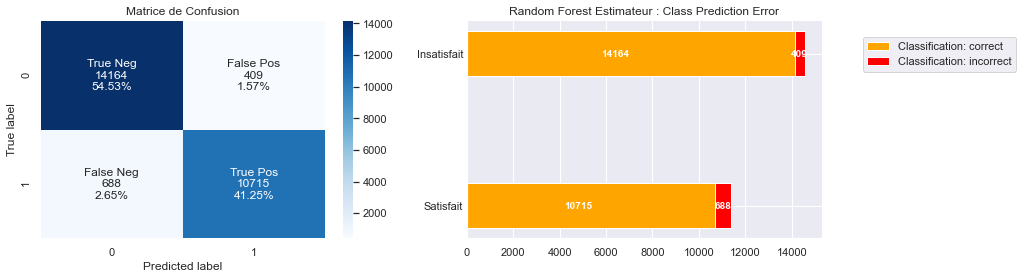

In [46]:
fig, axes = plt.subplots(1,2,figsize=(14,4))
cf_matrix, labels,group_counts = myModule.Utilis().plot_confusion_matrix(y_test, y_pred_full)

plt1 = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=axes[0])
plt1.set_ylabel('True label')
plt1.set_xlabel('Predicted label')
plt1.set_title("Matrice de Confusion")

correct = [int(group_counts[3]),int(group_counts[0])] #10372,13859
incorrect = [int(group_counts[2]),int(group_counts[1])] #1031,714
N = 2
ind = np.arange(N) + .15
width = 0.3


rects1 = axes[1].barh(ind, correct, width, color='orange') 
rects2 = axes[1].barh(ind, incorrect, width, left = myModule.Utilis().sumzip(correct), color='red') 
plt.legend([rects1, rects2], ["Classification: correct", "Classification: incorrect"],bbox_to_anchor=(1.1,0.95))
extra_space = 0.15
axes[1].set_yticks(ind)
axes[1].set_yticklabels( ('Satisfait', 'Insatisfait') )
axes[1].yaxis.set_tick_params(length=0,labelbottom=True)
axes[1].set_title("Random Forest Estimateur : Class Prediction Error")

for i, v in enumerate(correct):
    plt.text(v * 0.45, i + .145, str(v), color='white', fontweight='bold', fontsize=10, 
             ha='center', va='center')

for i, v in enumerate(incorrect):
    plt.text(correct[i] + v * 0.45, i + .145, str(v), color='white', fontweight='bold', fontsize=10, 
             ha='center', va='center')



axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)



plt.show()

### Remarques :

L'introduction des hyperparametres optimaux a permis d'améliorer le problème de sur-apprentissage constaté dans la partie précédente. 

### IV.4 : Modèle Final réduit aux variables les plus discriminates: Métriques et matrice de confusion associée

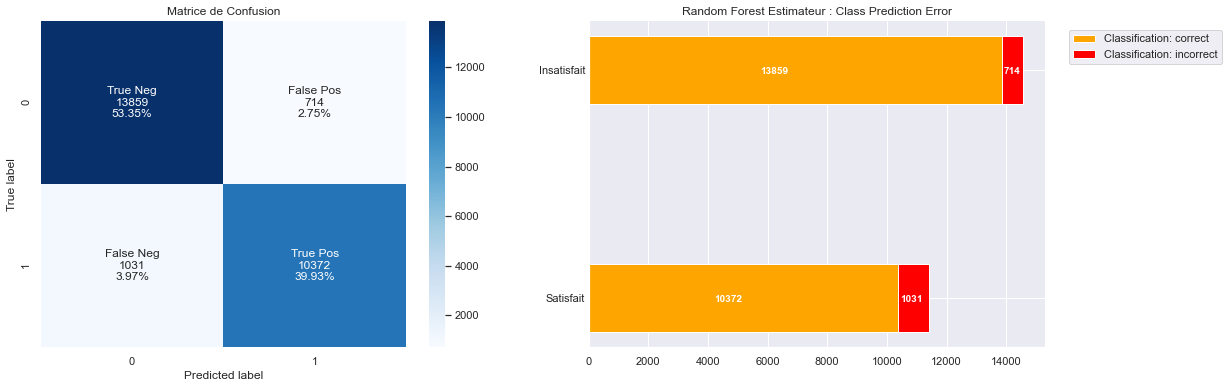

In [47]:
# confusion matrix

fig, axes = plt.subplots(1,2,figsize=(18,6))
cf_matrix, labels,group_counts = myModule.Utilis().plot_confusion_matrix(y_test, y_pred)

plt1 = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=axes[0])
plt1.set_ylabel('True label')
plt1.set_xlabel('Predicted label')
plt1.set_title("Matrice de Confusion")

correct = [int(group_counts[3]),int(group_counts[0])] #10372,13859
incorrect = [int(group_counts[2]),int(group_counts[1])] #1031,714
N = 2
ind = np.arange(N) + .15
width = 0.3


rects1 = axes[1].barh(ind, correct, width, color='orange') 
rects2 = axes[1].barh(ind, incorrect, width, left = myModule.Utilis().sumzip(correct), color='red') 
plt.legend([rects1, rects2], ["Classification: correct", "Classification: incorrect"],bbox_to_anchor=(1.4,0.99))
extra_space = 0.15
axes[1].set_yticks(ind)
axes[1].set_yticklabels( ('Satisfait', 'Insatisfait') )
axes[1].yaxis.set_tick_params(length=0,labelbottom=True)
axes[1].set_title("Random Forest Estimateur : Class Prediction Error")

for i, v in enumerate(correct):
    plt.text(v * 0.45, i + .145, str(v), color='white', fontweight='bold', fontsize=10, 
             ha='center', va='center')

for i, v in enumerate(incorrect):
    plt.text(correct[i] + v * 0.45, i + .145, str(v), color='white', fontweight='bold', fontsize=10, 
             ha='center', va='center')



axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)



plt.show()

### Conclusion Partie 4 :

**Pipeline Final :**

Notre pipeline final a effectué les opérations suivantes :

-  **Un prépocessing** des variables en tenant compte du type des variables présentes dans le jeu de données (scaling, imputation, encodage des variables catégorielles et ordinales)
- **La sélection des variables** a permis de mettre en exergue que les variables les plus pertinentes sur la satisfaction des passagers étaient **OnlineBoarding, Inflight wifi service, Class, Type of Travel, Inflight entertainment, Seat comfort**.<br> Seule celles-ci ont été inclues dans le modèle (cf. diagramme Pipeline ci-dessus).
- **Une recherche des meilleures hyperparamètres** a été menée [<sup id="fn2-back">1</sup>](#fn2 "footnote and tooltip 2") et a permis le calibrage du modèle sans problème d'overfitting détecté (confirmée via l'analyse de l'accuracy, precision, recall et f1-score ainsi que la validation curve).

**Pouvoir prédictif du modèle :**

- Le modèle obtient un bon pouvoir prédictif (erreur sur le test set estimé à 6.7%) et une analyse plus approfondie sur les erreurs sera menée dans la partie 5. <br>
- L'analyse de la validation curve confirme que la calibration du modèle (avec la suppression des variables inutiles et la recherche des hyperparametres) a permis de contrer l'overfitting détecté dans la partie précédente.
- La matrice de confusion confirme également que les prédictions du modèle sont en majorité bien équilibrées dans les deux classes.
- Le barplot montre que le modèle se trompe un peu plus dans la classe "Satisfait"

[<sup id="fn2">1</sup>](#fn2-back) à travers un RandomizedSearch

### Partie 5 : Analyse d'erreur

Dans cette partie, on se concentrera plus en détail sur le **modèle final réduit**, contenant uniquement les variables les plus significatives.

La partie précédente a permis de montrer que l'accuracy du classifier a été estimée à 93.3% avec une précision de 93.6% et un recall de 91.0% dans la base de test.

Cependant, ces mesures sont sur le dataset global est ne permet pas d'analyser plus en détails le taux d'erreur dans les sous-populations. L'analyse d'erreur tend à observer comment sont distribués les erreurs au sein des différentes variables et de savoir si le modèle se trompe plus souvent dans une catégorie que dans une autre.

La matrice de confusion nous indique que sur les 25 976 observations de la base de test :

- 24 223 observations ont été correctement classifiées;
- 1 745 ont été mal classifiées (somme des faux positifs et faux négatifs)

Sur ces 1 745 observations incorrectes on observe la répartition suivante : 
- 714 sont des erreurs de type 1 ou faux positifs : le modèle prédit que le passager a été satisfait de son vol alors qu'en réalité il/elle a exprimé une insatisfaction;
- 1 031 sont des erreur de type 2 ou faux négatifs: le modèle prédit que le passager a été insatisfait de son vol alors qu'en réalité il/elle a exprimé une satisfaction;

On cherchere donc à analyser comment sont distribués ces erreurs sur ces deux sous-populations? 

In [48]:
# création du dataframe pour les erreurs

cols_final = ['Online boarding', 'Inflight wifi service', 'Class', 'Type of Travel', 'Inflight entertainment', 'Seat comfort']

df_variables = final_X_test[cols_final]

df_error = pd.DataFrame(columns=["truth", "pred"])

df_error["truth"],df_error["pred"] = y_test,y_pred

df_error = df_error[df_error["truth"]!=df_error["pred"]]

df_error = pd.merge(df_error, df_variables, left_index=True, right_index=True)



df_error

truth  pred  Online boarding  Inflight wifi service     Class  \
4          1     0                1                      2       Eco   
24         0     1                5                      4       Eco   
29         0     1                4                      4       Eco   
31         1     0                2                      2       Eco   
38         0     1                4                      4  Business   
...      ...   ...              ...                    ...       ...   
25913      1     0                4                      3  Business   
25930      1     0                4                      4       Eco   
25944      0     1                3                      2  Business   
25945      1     0                4                      3       Eco   
25954      0     1                4                      4  Business   

        Type of Travel  Inflight entertainment  Seat comfort  
4      Business travel                       2             2  
24     Business travel                       2             2  
29     Business travel                       4             4  
31     Business travel                       2             5  
38     Business travel                       2             4  
...                ...                     ...           ...  
25913  Business travel                       3             4  
25930  Business travel                       3             4  
25944  Business travel                       4             4  
25945  Business travel                       3             3  
25954  Business travel                       4             4  

[1745 rows x 8 columns]

In [49]:
fp = df_error[(df_error["truth"]==0) &df_error["pred"]==1] #création de la base des faux positifs
fn = df_error[(df_error["truth"]==1) &df_error["pred"]==0]
print("Faux positifs shape :",fp.shape)
print("Faux negatifs shape :",fn.shape)

Faux positifs shape : (714, 8)
Faux negatifs shape : (1745, 8)


In [50]:

# run the following code to display the barplot in an interactive way

fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=False,
                    vertical_spacing=0.15)
cols_final=['Class','Inflight entertainment','Seat comfort','Online boarding','Inflight wifi service','Type of Travel']
for col in cols_final:
    trace1 = go.Bar(
            x=myModule.Utilis().pd_perc(fp,col).index, 
            y=myModule.Utilis().pd_perc(fp,col).perc, 
            text = [str(i) + '%' for i in myModule.Utilis().pd_perc(fp,col).perc],
         
            name = "Faux Positifs- " + str(col))
    fig.append_trace(trace1,1,1)
    trace2 = go.Bar(
                x=myModule.Utilis().pd_perc(fn,col).index,
                y=myModule.Utilis().pd_perc(fn,col).perc,
                text = [str(i) + '%' for i in myModule.Utilis().pd_perc(fn,col).perc],
                name = "Faux Négatifs - " + str(col))
    fig.append_trace(trace2,2,1)

    Ld=len(fig.data)
    Lc =len(col)
    for k in range(2, Ld):
        fig.update_traces(visible=False, selector = k)
    def create_layout_button(k, customer):
        
        visibility= [False]*2*Lc
        for tr in [2*k, 2*k+1]:
            visibility[tr] =True
        return dict(label = customer,
                    method = 'restyle',
                    args = [{'visible': visibility,
                             'title': customer,
                             'showlegend': True
                            }])    
    

fig.update_layout(
       title = "Analyse d'erreur",
        title_x = 0.5,
        annotations=[
        dict(text='Select Variables <br>',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=-0.45,
                y=0.89,
                
                borderwidth=1),
        
    ],
        
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            x = -0.45,
            xanchor = 'left',
            y = 0.73,
            yanchor = 'top',
            buttons = [create_layout_button(k, customer) for k, customer in enumerate(cols_final)]
            ),
            
        ])
    
fig.show()


### Remarques Générales

- Le graphique ci-dessus permet d'analyser pour chaque variable la répartition de chaque type d'erreur (type 1 et type 2) sur les différentes catégories qu'elle contient.
- Par example en analysant la variable 'Class' on constate que le modèle se trompe plus souvent dans la classe business que les deux autres classes sur la classe "Satisfait". Cette erreur est plus équilibrée sur la classe "Insatisfait".
- En ce qui concerne les services proposés par la compagnie aérienne (online boarding, Inflight entertainment, Seat comfort, Inflight service) la répartition des erreurs dans les deux classes concernent majoritairement ceux qui ont reçu par les passagers une note de 4 étoiles.
- Enfin, le modèle se trompe le plus souvent lorsque il s'agit de voyages à titre professionnels.



### Conclusion :

Cette projet a porté sur l'étude d'une enquête menée par une compagnie aérienne sur la satisfaction des ses passagers.

Il s'agisait de comprendre d'une part quels éléments peuvent affecter la satisfaction de ses clients, et d'autre part d'être en mesure de caler un modèle prédictif afin d'estimer dans le futur la probabilité de satisfaction.

Notre étude s'est d'abord intéressé à l'analyse de la base de données et de déterminer si celle-ci contenait des données manquantes ou aberrantes, auquel cas il aurait fallut les traiter avant de passer à la modélisation. <br>
La première partie a été uniquement consacrée à l'analyse exploratoire des données en combinant une partie univariée (analyse des variables ainsi que de la variable à expliquer) et une partie bi-variée afin d'exploiter et d'identifier les correlations entre les différentes variables et la variable à prédire.

De cette première partie il en ressort:
- La base de données ne présentait pas d'anomalies majeures (seules 310 observations étaient manquantes pour la variable 'Arrival Delay in Minutes' dans la base d'entraînement)	
- Les variables 'Arrival Delay in Minutes' et 'Arrival Delay in Minutes' sont fortement corrélées positivement (coefficient de corrélation estimé à 96%)
- La répartition concernant la variable à prédire des deux classes est plus ou moins équilibrée et ce dans les deux bases
- Plus les services proposés par la compagnie aérienne sont mieux notés (noté au moins égale à 4 étoiles), meilleure est la satisfaction du client, en revanche pas de différence observée entre les passagers homme ou femme.

La seconde partie a été articulée en deux étapes :
- construction d'un modèle de référence afin de pouvoir l'améliorer par la suite
- recherche et sélection des variables les plus significatives 
- recherche des hyperparametres optimaux

A noter que le modèle de référence présentait un problème de sur-apprentissage et qu'une recherche des paramètres optimaux via une cross-validation a été menée.

De cette analyse, sur les 22 variables seules 6 ont été sélectionnées et il s'agisait des variables 'Class','Inflight entertainment','Seat comfort','Online boarding','Inflight wifi service','Type of Travel'.

En ce qui concerne le modèle prédictif développé, le classifier de RandomForest présentait les meilleures performances avec :
- accuracy de 93.3%
- précision de 93.6% 
- recall de 91.0% 

Pour terminer, une analyse d'erreur a aussi été menée afin d'observer les différences entre les erreurs de type 1 et 2.

De cette analyse, il en ressort que :
- les erreurs étaient plus des erreurs de type 2
- au sein des catégories des différentes variables, la répartion des erreurs n'étaient pas homogènes (voir partie 5).